In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import os
import sys
from datetime import datetime

parent = os.path.dirname(os.getcwd())  # workaround to import from utils/
sys.path.append(parent)

from utils.db_utils import df_from_snowflake
pd.option_context('display.max_rows', None,)
pp.style.use('ggplot')

In [44]:
# OVERVIEW
with open ('sql_template/revenue.sql', 'r') as sql_file:
    df = df_from_snowflake(sql_file.read())
df.set_index('DT', inplace=True)

In [45]:
df

,ID,USERS,RETURNING_USERS,RETURNING_USERS_SHARE,SESSIONS,RETURNING_SESSIONS,RETURNING_SESSIONS_SHARE,REVENUES,ONSITE_BOOKINGS,SEARCHES,UWOB,CUM_USERS,CUM_REVENUES,CUM_ONSITE_BOOKINGS,CUM_UWOB,RPU,ONSITE_BOOKING_PER_USER
DT,,,,,,,,,,,,,,,,,
2024-02-27,e3887v0,4256,1831,0.430216,4678,2073,0.443138,1849.517531,6.0000000000,12493,6,4256,1849.517531,6.0000000000,6,0.434567,0.001409774436
2024-02-27,e3887v1,4197,1735,0.413391,4592,1971,0.429225,1644.439443,8.0000000000,12246,8,4197,1644.439443,8.0000000000,8,0.391813,0.001906123421
2024-02-28,e3887v0,10649,3562,0.334492,12668,4525,0.357199,4226.888245,11.0000000000,30084,10,14905,6076.405775,17.0000000000,16,0.407676,0.001140556860
2024-02-28,e3887v1,10666,3532,0.331146,12781,4490,0.351303,4616.071598,20.0000000000,31007,19,14863,6260.511041,28.0000000000,27,0.421214,0.001883872704
2024-02-29,e3887v0,9756,3098,0.317548,11649,3909,0.335565,3084.189859,7.0000000000,29503,7,24661,9160.595634,24.0000000000,23,0.371461,0.000973196545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-06,e3887v1,16591,3306,0.199265,19894,4089,0.205539,4857.307096,21.0000000000,49463,21,1612562,567355.604454,2770.0000000000,2705,0.351835,0.001717763410
2024-06-07,e3887v0,14981,3116,0.207997,17755,3855,0.217122,2907.321839,12.0000000000,44201,12,1616742,543422.829281,2521.0000000000,2473,0.336122,0.001559308783
2024-06-07,e3887v1,15013,3043,0.202691,17970,3764,0.209460,2186.766238,18.0000000000,43771,18,1627575,569542.370692,2788.0000000000,2723,0.349933,0.001712977897


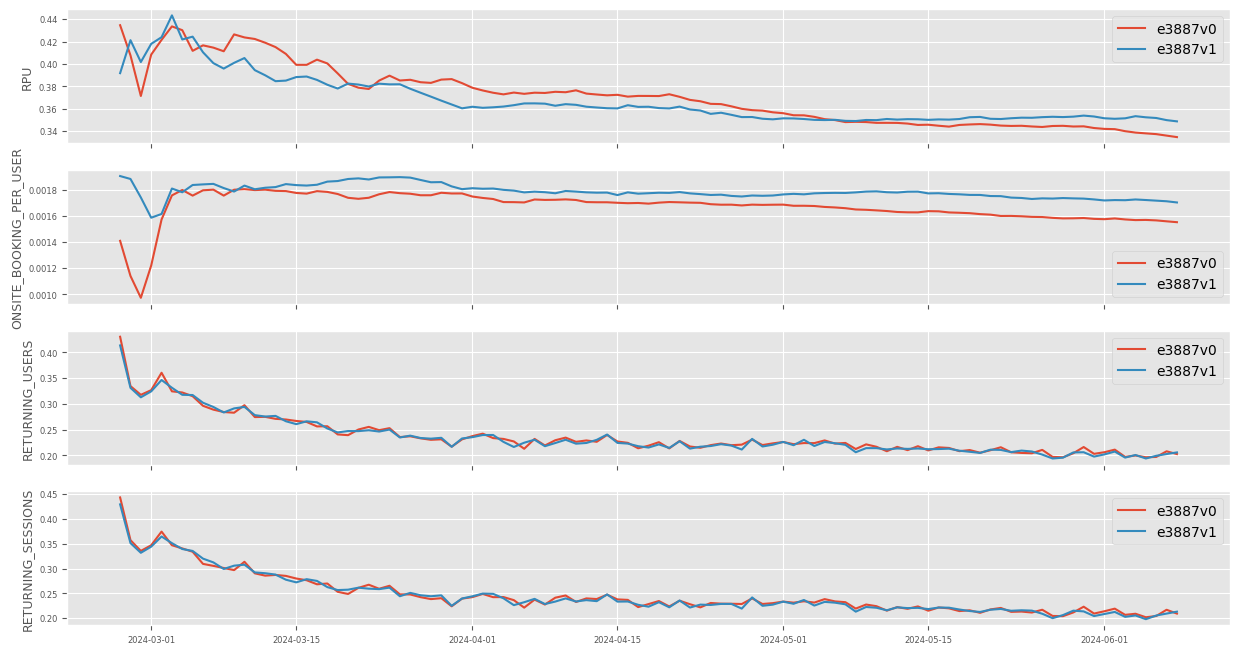

In [52]:
_, ax = pp.subplots(nrows=4, ncols=1, sharex=True, figsize=(15,8))

#first_glance.groupby('ID')['RPU'].plot(kind='line', ax=ax )
ax[0].plot(df[df['ID']=='e3887v0']['RPU'], label = 'e3887v0')
ax[0].plot(df[df['ID']=='e3887v1']['RPU'], label = 'e3887v1')
ax[0].legend()
ax[0].set_ylabel('RPU', size=9)
ax[0].tick_params(axis='both', which='both', labelsize=6)

ax[1].plot(df[df['ID']=='e3887v0']['ONSITE_BOOKING_PER_USER'], label = 'e3887v0')
ax[1].plot(df[df['ID']=='e3887v1']['ONSITE_BOOKING_PER_USER'], label = 'e3887v1')
ax[1].legend()
ax[1].set_ylabel('ONSITE_BOOKING_PER_USER', size=9)
ax[1].tick_params(axis='both', which='both', labelsize=6)

ax[2].plot(df[df['ID']=='e3887v0']['RETURNING_USERS_SHARE'], label = 'e3887v0')
ax[2].plot(df[df['ID']=='e3887v1']['RETURNING_USERS_SHARE'], label = 'e3887v1')
ax[2].legend()
ax[2].set_ylabel('RETURNING_USERS', size=9)
ax[2].tick_params(axis='both', which='both', labelsize=6)

ax[3].plot(df[df['ID']=='e3887v0']['RETURNING_SESSIONS_SHARE'], label = 'e3887v0')
ax[3].plot(df[df['ID']=='e3887v1']['RETURNING_SESSIONS_SHARE'], label = 'e3887v1')
ax[3].legend()
ax[3].set_ylabel('RETURNING_SESSIONS', size=9)
ax[3].tick_params(axis='both', which='both', labelsize=6)



### Subscription Rate

In [4]:
with open ('sql_template/subscription_rate.sql', 'r') as sql_file:
    crm = df_from_snowflake(sql_file.read())
    
crm.sort_values(by='DT', ignore_index=True, inplace=True)
crm.set_index('DT', inplace=True)

Text(0, 0.5, 'CUM_SUBSCRIBERS')

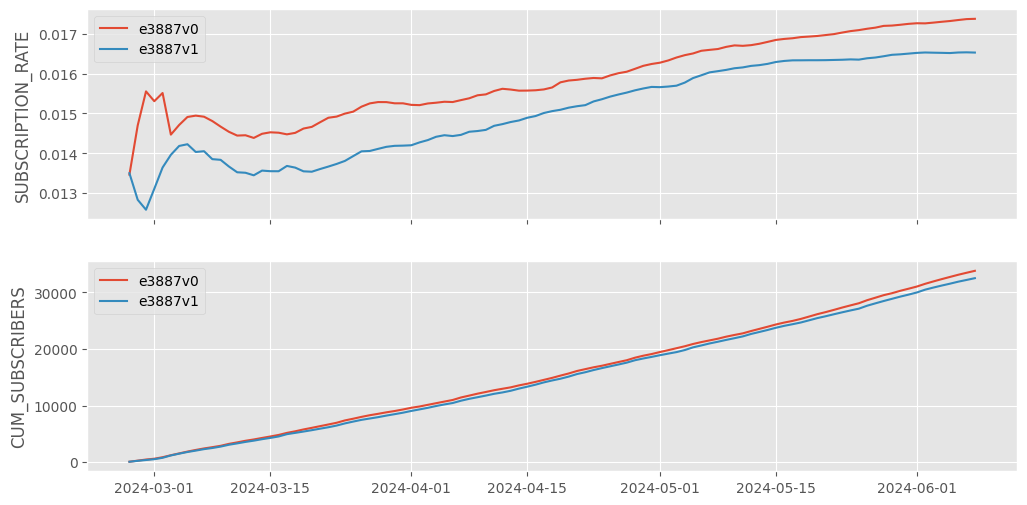

In [5]:
_, ax = pp.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,6))


ax[0].plot(crm[crm['ID']=='e3887v0']['SUBSCRIPTION_RATE'], label = 'e3887v0')
ax[0].plot(crm[crm['ID']=='e3887v1']['SUBSCRIPTION_RATE'], label = 'e3887v1')
ax[0].legend()
ax[0].set_ylabel('SUBSCRIPTION_RATE')


ax[1].plot(crm[crm['ID']=='e3887v0']['CUM_SUBSCRIBERS'], label = 'e3887v0')
ax[1].plot(crm[crm['ID']=='e3887v1']['CUM_SUBSCRIBERS'], label = 'e3887v1')
ax[1].legend()
ax[1].set_ylabel('CUM_SUBSCRIBERS')


In [6]:
crm

,ID,COOKIE_USER_IDS,SUBSCRIBERS,CUM_USERS,CUM_SUBSCRIBERS,SUBSCRIPTION_RATE
DT,,,,,,
2024-02-27,e3887v0,4678,63,4678,63,0.013467
2024-02-27,e3887v1,4592,62,4592,62,0.013502
2024-02-28,e3887v0,12668,192,17346,255,0.014701
2024-02-28,e3887v1,12781,161,17373,223,0.012836
2024-02-29,e3887v0,11649,196,28995,451,0.015554
...,...,...,...,...,...,...
2024-06-06,e3887v0,19453,385,1909882,33123,0.017343
2024-06-07,e3887v1,17970,305,1947931,32205,0.016533
2024-06-07,e3887v0,17755,352,1927637,33475,0.017366


### Subscriber Sources

In [7]:
with open ('sql_template/crm_subscriber.sql', 'r') as sql_file:
    subscriber = df_from_snowflake(sql_file.read())



In [8]:
subscriber

,ORIGIN_SOURCE,'e3887v0','e3887v1'
0,account_apple,95,126
1,account_email,992,1358
2,account_facebook,42,36
3,account_facebook_smartlock,142,69
4,account_google,463,393
5,account_google_smartlock,24473,22939
6,booking,4300,4528
7,casamundo_import,169,163
8,casevacanza_import,153,190
9,customer_support,170,185


### App Installs - from Appsflyer

In [ ]:
with open ('sql_template/appsflyer_install.sql', 'r') as sql_file:
    installs = df_from_snowflake(sql_file.read())

installs.set_index('DT', inplace=True)

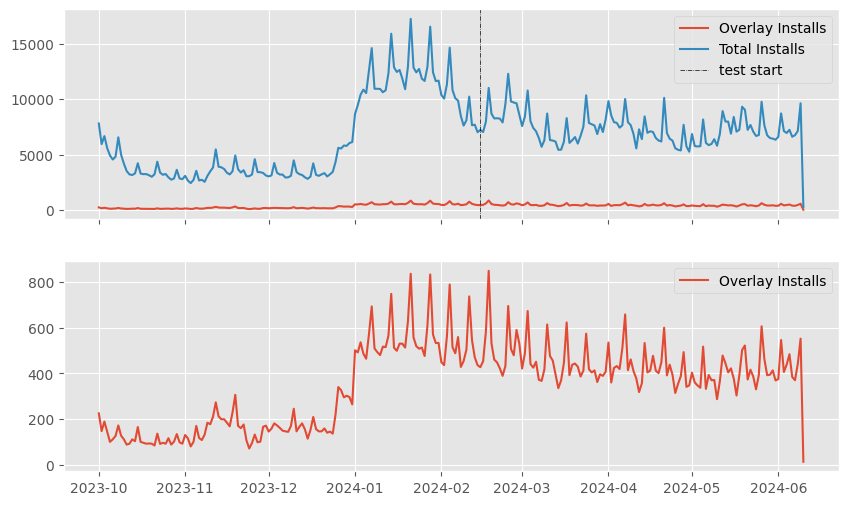

In [40]:
_, ax = pp.subplots(nrows=2, ncols=1, sharex=True, figsize= (10,6))

ax[0].plot(installs.loc[:,['OVERLAY_INSTALLS','TOTAL_INSTALLS']], label=('Overlay Installs', 'Total Installs' ))
ax[0].axvline(x=datetime(2024,2,15), color='black', ls='-.', lw=0.5, label='test start')
ax[0].legend()

ax[1].plot(installs.loc[:,'OVERLAY_INSTALLS'], label='Overlay Installs')
ax[1].legend( loc='upper right')


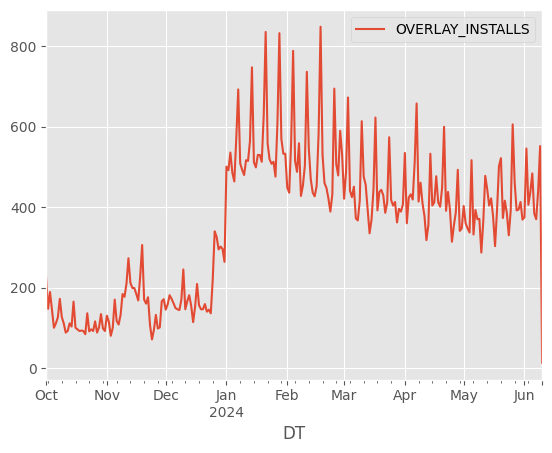

In [20]:
installs.loc[:,'OVERLAY_INSTALLS'].plot()
pp.legend()

In [19]:
# Deeplink CTA click on large-overlay
with open ('sql_template/large_overlay_click.sql', 'r') as sql_file:
    overlay_clicks = df_from_snowflake(sql_file.read())

overlay_clicks

,ID,SESSIONS,APP_INSTALL_LARGE_OVERLAY
0,e3887v0,1946580,5274
1,e3887v1,1967571,8


In [56]:
tuple(overlay_clicks.loc[:,'ID'])

('e3887v0', 'e3887v1')